# Practical Session 1

#### Soufiane MOUTEI

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-success">
<span class="label label-success" style="font-size:15px;">Question 0</span><br><br>
    In many practical applications, we often need to compute $s = \log \sum_{i=1}^{I} \exp(v_i)$, where each $v_i < 0$ and $|v_i|$ is very large. Derive (mathematically) and implement a numerically stable algorithm for computing ‘log(sum(exp(v)))’, where $v = {\{v_i\}^I}_{i=1}$ is a vector of numbers. Explain why it should work. Test your algorithm on log(sum(exp{-1234, -1235})).
</div>

In [2]:
def question_0(v):
    v_max = np.max(v)
    
    return np.log(np.sum(np.exp(v - v_max))) + v_max

In [3]:
question_0(np.array([-1234, -1235]))

-1233.6867383124818

<div class="alert alert-info">
<span class="label label-primary" style="font-size:15px;">ANSWER</span>
     <ul>
    <li><b>Proof of implementation</b>: Let $v^* = \max_{i} v_i$ then: <br>
    $\begin{equation}
        s = \log \sum_{i=1}^{I} \exp(v_i) = \log (\sum_{i=1}^{I} \exp(v_i - v^*)\exp(v^*)) = \log (\sum_{i=1}^{I} \exp(v_i - v^*)) + v^*
    \end{equation}$ <br>
    hence our return value.
    </li>
    <li>This algorithm gives a numerically stable for two simple reasons, $v^*$ is one of the $v_i$, for instance $v_k$, then we'll have within the logarithm $1 + \sum_{i=1; i\neq k}^{I} \exp(v_i - v_k) > 0$ which makes the logarithm calculation possible, and in addition, for all $i$ we have $v_i - v^* \leq 0$ which makes the computation of the exponentials not expensive.</li>
    </ul>
</div>

<div class="alert alert-success">
<span class="label label-success" style="font-size:15px;">Question 1</span><br><br>

A robot is moving across a circular corridor. We assume that the possible positions of the robot is a discrete set with $N$ locations. The initial position of the robot is unknown and assumed to be uniformly distributed. At each step $k$, the robot stays where it is with probability $\epsilon$, or moves to the next point in counter-clock direction with probability $1 − \epsilon$. At each step $k$, the robot can observe its true position with probability $w$. With probability $1 − w$, the position sensor fails and gives a measurement that is independent from the true position (uniformly distributed).
<br><br>
1 - Choose the appropriate random variables, define their domains, write down the generative model and draw the associated directed graphical model.
</div>

<div class="alert alert-info">
     <ul>
    <li>Let $K$ be the number of steps and we have given the question $N$ locations. Let us consider two families of random variables $\{x_i\}^K_{i=0}$ and $\{y_i\}^K_{i=1}$ where $x_i$ is the position of the robot and $y_i$ the observation of the robot for its position, at step $i$. Both two families of random variables has values in the domain $[1, N]$.</li>
    <li><b>The generative model:</b> $p(x_i | y_i)$</li>
    <li>The associated directed graphical model:</li>
    </ul>

</div>

<img src="graph.png">

<div class="alert alert-success">

2 - Define the conditional probability tables (i.e., the transition model and the observation model) given the verbal description above.
</div>

<div class="alert alert-info">
     <ul>
    <li> <b> The transistion model</b>: At each step $k$, the robot stays where it is ($x_{k+1} = x_k$) with probability $\epsilon$, or moves to the next point in <b>counter-clock direction</b> ($x_{k+1} > x_k$ or ($x_{k+1} = 1 \land x_k = N$)) with probability $1 − \epsilon$. Thus:<br>
        $
        p(x_{k+1} | x_k) = \epsilon 
        \begin{bmatrix}
            1       & 0 & 0 & \dots & 0 \\
            0       & 1 & 0 & \dots & 0 \\
            \dots       & \dots & \ddots & \dots & \dots \\
            \dots       & \dots & \dots & \ddots & \dots \\
            0       & 0 & 0 & \dots & 1
        \end{bmatrix} 
        + (1 - \epsilon) 
        \begin{bmatrix}
            0       & 0 & 0 & \dots & 1 \\
            1       & 0 & 0 & \dots & 0 \\
            \dots       & \ddots & \dots & \dots & \dots \\
            \dots       & \dots & \ddots & \dots & \dots \\
            0       & 0 & \dots & 1 & 0
        \end{bmatrix} 
        $
    </li>
    <li><b>The observation model:</b> At each step $k$, the robot can observe its true position ($x_k = y_k$) with probability $w$. With probability $1 − w$, the position sensor fails and gives a measurement that is independent from the true position (<b>uniformly</b> distributed $u(1,N)$). So: <br>
    
    $p(y_k = j | x_k = i) = w \delta (i - j) + (1-w) \frac{1}{N} $ (where $\delta (i - j) = 1$ if $i = j$ and $0$ otherwise) and this for all $i, j \in [1, N]$. Therefore: <br>
    $
        p(y_{k} | x_k) = w 
        \begin{bmatrix}
            1       & 0 & 0 & \dots & 0 \\
            0       & 1 & 0 & \dots & 0 \\
            \dots       & \dots & \ddots & \dots & \dots \\
            \dots       & \dots & \dots & \ddots & \dots \\
            0       & 0 & 0 & \dots & 1
        \end{bmatrix} 
        + \frac{1 - w}{N}
        \begin{bmatrix}
            1       & \dots & \dots & \dots & 1 \\
            \vdots       & \ddots & \dots & \dots & \vdots \\
            \vdots       & \dots & \ddots & \dots & \vdots \\
            \vdots       & \dots & \dots & \ddots & \vdots \\
            1       & \dots & \dots & \dots & 1
        \end{bmatrix} 
        $
    </li>
    </ul>
</div>

<div class="alert alert-success">

3 - Specify the following verbal statements in terms of posterior quantities using mathematical notation. For example
“the distribution of the robot’s location two time steps later given its current position at time $k$” should be answered as $p(x_{k+2}|x_k)$.
</div>

<div class="alert alert-info">
     <ol style="list-style-type: lower-alpha;">
    <li>Distribution of the robot’s current position given the observations so far: $p(x_k | y_{1:k})$</li>
    
    <li>Distribution of the robot’s position at time step $k$ given all the observations: $p(x_k | y_{1:K})$</li>

    <li>Distribution of the robot’s next position given the observations so far: $p(x_{k+1} | y_{1:k})$</li>

    <li>Distribution of the robot’s next sensor reading given the observations so far: $p(y_{k+1} | y_{1:k})$</li>

    <li>Distribution of the robot’s initial position given observations so far: $p(x_0 | y_{1:k})$</li>

    <li>Most likely current position of the robot given the observations so far: $\arg\!\max_{x_k} p(x_k | y_{1:k})$</li>

    <li>Most likely trajectory taken by the robot from the start until now given the observations so far: $\arg\!\max_{x_{1:k}}p(x_{1:k} | y_{1:k})$</li>

    </ol>
</div>

<div class="alert alert-success">

4 - Implement a program that simulates this scenario; i.e., generates realizations from the movements of the robot and the associated sensor readings. Simulate a scenario for $k = 1, \dots , 100$ with $N = 50$, $\epsilon = 0.3$, $w = 0.8$.
</div>

In [4]:
N = 50    # Number of states
K = 100 # Number of steps

# Transition model
ep = 0.3 # Probability of staying at the same position
E = np.identity(N)
A = ep * E + (1 - ep) * E[[N-1] + list(range(0, N-1))] # Transition Matrix

# Observation model
w = 0.8 # Probability of observing true state 
C = w * E + (1 - w) * np.ones((N,N)) / N # Observation matrix

# Prior p(x_1)
pri = np.ones(N) / N

def hmm_generate_data(A, C, pri, N, K) :
    """
    Generating data from the true model
    
    Parameters
    ----------
    A : `numpy.array`, shape (N, N)
        Transition matrix
        
    C : `numpy.array`, shape (N, N)
        Observation matrix
    
    pri : `numpy.array`, shape (N,)
        Prior
    
    N : `int`
        Number of states
        
    K : `int`
        Number of steps

    Returns
    -------
    obs : `numpy.array`, shape (K,)
        Observations
    
    state : `numpy.array`, shape (K,)
        The state trajectory
    """
    
    state = np.zeros(K, dtype=int)
    obs = np.zeros(K, dtype=int)
    
    state[0] = np.random.choice(N, p=pri)
    obs[0] = np.random.choice(N, p=C[:, state[0]])
        
    for k in range(1, K):
        state[k] = np.random.choice(N, p=A[:, state[k - 1]])
        obs[k] = np.random.choice(N, p=C[:, state[k]])

    return obs, state

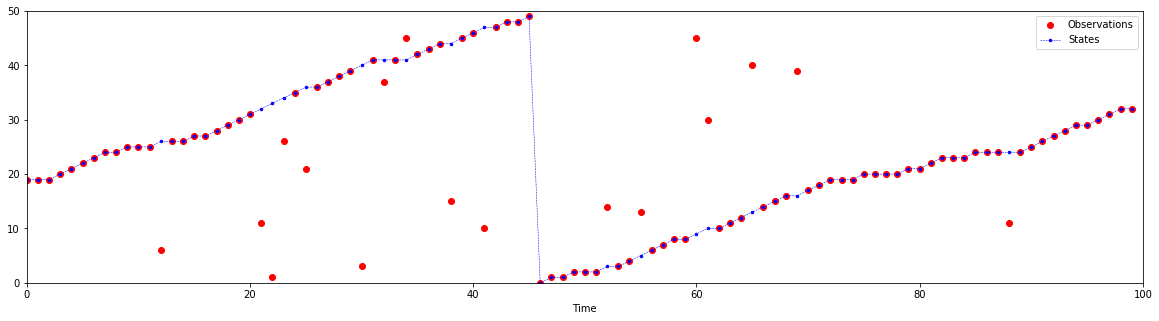

In [5]:
y, state = hmm_generate_data(A, C, pri, N, K)

plt.figure(figsize = (20,5))
plt.plot(y, "ro", label="Observations")
plt.plot(state, "b--", label="States",marker=".", linewidth=0.5, markersize=5.)
plt.xlabel("Time")
plt.legend()
plt.axis([0, 100, 0, 50])
plt.show()

<div class="alert alert-success">

5 - Implement the Forward-Backward algorithm for computing the quantities defined in 3-a,b,f. (Attention: be careful with numerical stability! Modify the log-sum-exp trick for this algorithm)
</div>

In [6]:
def state_predict(A, log_p):
    """
    Computing A * p in log-domain
    
    Parameters
    ----------
    A : `numpy.array`, shape (N, N)
        State transition matrix
        
    log_p : `numpy.array`, shape (N, K)
        Filtred potential
    
    Returns
    -------
    log_pp : `numpy.array`, shape (N, K)
        Predicted potential
    """
    
    log_p_max = np.max(log_p) # Stable computation, a modification of the question 0
    p = np.exp(log_p - log_p_max)
    log_pp = np.log(A.dot(p)) + log_p_max
    
    return log_pp

def state_update(obs, log_pp):
    """
    Updating the state
    
    Parameters
    ----------
    obs : `numpy.array`, shape (N, N)
        Observation matrix: p(y_k | x_k)
        
    log_pp : `numpy.array`, shape (N, K)
        Predicted potential: log p(x_k, y_{1:k-1})
    
    Returns
    -------
    lup : `numpy.array`, shape (N, K)
        log(p(x_k, y_{1:k-1}) p(y_k| x_k))
    """
    
    lup = np.log(obs) + log_pp
    return lup

In [7]:
def forward_backward(A, C, pri, N, K, y):
    # Forward pass
    log_alpha = np.zeros((N, K)) # log p(x_{k-1}, y_{1:k-1})
    log_alpha_predict = np.zeros((N, K)) # log p(x_k, y_{1:k-1})

    # Initializing
    log_alpha_predict[:, 0] = np.log(pri)
    log_alpha[:, 0] = state_update(C[y[0]], log_alpha_predict[:, 0])

    for k in range(1, K):
        log_alpha_predict[:, k] = state_predict(A, log_alpha[:, k - 1])
        log_alpha[:, k] = state_update(C[y[k]], log_alpha_predict[:, k])

    # End Forward pass

    # Backward pass
    log_beta = np.zeros((N, K)) # log p(y_{k+1:K}|x_{k+1})
    log_beta_postdict = np.zeros((N, K)) # log p(y_{k+1:K}| x_k)

    # Initializing
    log_beta_postdict[:, K-1] = np.zeros(N)
    log_beta[:, K-1] = state_update(C[y[K-1]], log_beta_postdict[:, K-1])

    for k in range(K-2, -1, -1):
        log_beta_postdict[:, k] = state_predict(A.T, log_beta[:, k + 1])
        log_beta[:, k] = state_update(C[y[k]], log_beta_postdict[:, k])
    # End backward pass
    
    return log_alpha, log_beta_postdict

In [8]:
log_alpha, log_beta_postdict = forward_backward(A, C, pri, N, K, y)

# Filtering (3.a formula): p(x_k | y_{1:k})
sum_log_alpha = question_0(log_alpha)
log_filtering = log_alpha - sum_log_alpha

# Smoothing (3.b formula): p(x_k | y_{1:K})
log_gamma =  log_alpha + log_beta_postdict # p(x_k, y_{1:K})
sum_log_gamma = question_0(log_gamma)
log_smoothing = log_gamma - sum_log_gamma

# Most likely position of the robot given the observations so far (3.f formula): argmax_{x_k} (p(x_k | y_{1:k}))
most_likely_position = np.zeros(K)
for i in range(K):
    most_likely_position[i] = np.argmax(log_filtering[:,i])

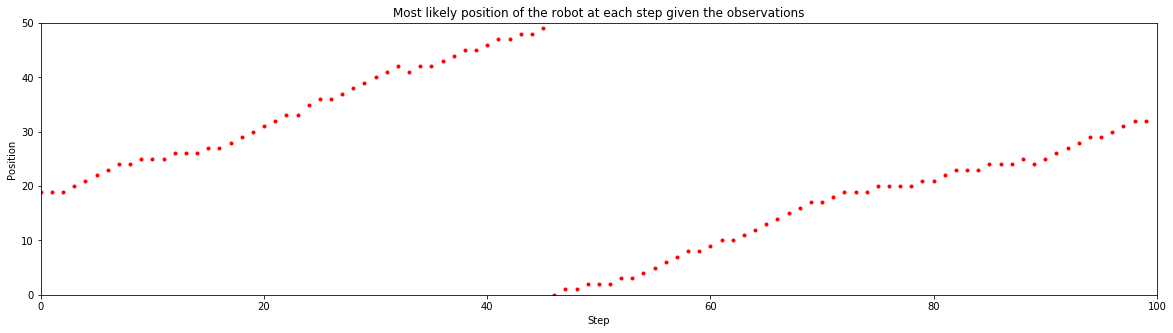

In [9]:
plt.figure(figsize = (20,5))
plt.plot(most_likely_position, "r.")
plt.xlabel("Step")
plt.ylabel("Position")
plt.title("Most likely position of the robot at each step given the observations")
plt.axis([0, 100, 0, 50])
plt.show()

<div class="alert alert-success">

6 - Assume now that at each step the robot can be kidnapped with probability $\kappa$. If the robot is kidnapped its new position is independent from its previous position and is uniformly distributed. Repeat 4 and 5 for this new model with $\kappa = 0.1$. Can you reuse your code?
</div>

<div class="alert alert-info">
<span class="label label-primary" style="font-size:15px;">ANSWER</span><br><br>
With a probability $1 - \kappa$, the robot will keep using its normal moving using the matrix $A$ (the transition matrix). However, with a probability $\kappa$, the robot is kidnapped and the positions become <b>independent</b> and <b>uniformly distributed</b>. This gives us the new transition matrix $A_{new}$:<br>
 $
        A_{new} = (1 - \kappa)  A + \frac{\kappa}{N}
        \begin{bmatrix}
            1       & \dots & \dots & \dots & 1 \\
            \vdots       & \ddots & \dots & \dots & \vdots \\
            \vdots       & \dots & \ddots & \dots & \vdots \\
            \vdots       & \dots & \dots & \ddots & \vdots \\
            1       & \dots & \dots & \dots & 1
        \end{bmatrix} 
 $
<br>
Therefore, we can use our previous code by passing in the parameters of the function `forward_backward` the new matrix $A_{new}$ as well as the new observations.
</div>

In [10]:
kappa = 0.1
A_new = (1 - kappa) * A + kappa * np.ones((N,N)) / N

y_new, state_new = hmm_generate_data(A_new, C, pri, N, K)

log_alpha_new, log_beta_new_postdict = forward_backward(A_new, C, pri, N, K, y_new)

# Filtering (3.a formula): p(x_k | y_{1:k})
sum_log_alpha_new = question_0(log_alpha_new)
log_filtering_new = log_alpha_new - sum_log_alpha_new

# Smoothing (3.b formula): p(x_k | y_{1:K})
log_gamma_new =  log_alpha_new + log_beta_new_postdict # p(x_k, y_{1:K})
sum_log_gamma_new = question_0(log_gamma_new)
log_smoothing_new = log_gamma_new - sum_log_gamma_new

# Most likely position of the robot given the observations so far (3.f formula): argmax_{x_k} (p(x_k | y_{1:k}))
most_likely_position_new = np.zeros(K)
for i in range(K):
    most_likely_position_new[i] = np.argmax(log_filtering_new[:,i])

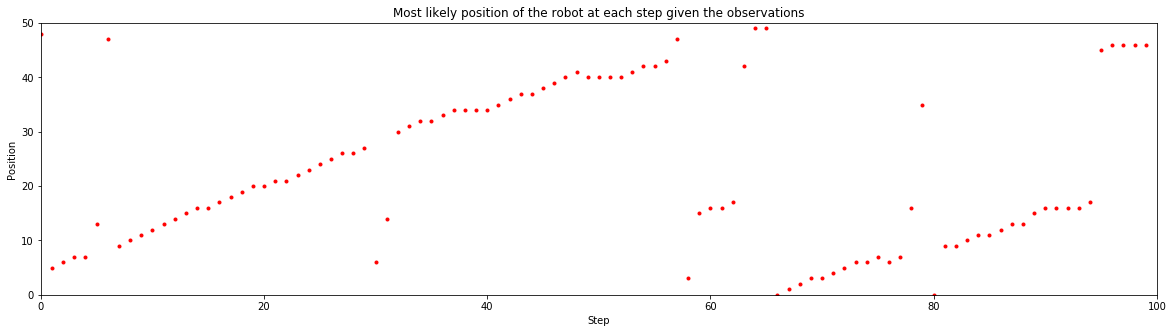

In [11]:
plt.figure(figsize = (20,5))
plt.plot(most_likely_position_new, "r.")
plt.xlabel("Step")
plt.ylabel("Position")
plt.title("Most likely position of the robot at each step given the observations")
plt.axis([0, 100, 0, 50])
plt.show()